### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Importing Dataset

In [15]:
url = "https://raw.githubusercontent.com/masterArnob/IBM-Machine-Learning-with-Python/refs/heads/main/Linear_Regression/car.csv"
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Step 1: Data Preprocessing

In [16]:
df.info

<bound method DataFrame.info of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION

In [17]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

### Step 2: Train/test split

In [30]:
X = df[['ENGINESIZE']]
y = df['CO2EMISSIONS']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Algorithm Setup

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [33]:
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step 4: Predictions

In [34]:
y_pred = reg.predict(X_test)
y_pred

array([309.55670218, 262.76512771, 266.66442558, 243.26863835,
       204.27565962, 243.26863835, 266.66442558, 282.26161707,
       321.2545958 , 266.66442558, 266.66442558, 387.54265963,
       251.06723409, 262.76512771, 266.66442558, 262.76512771,
       188.67846813, 266.66442558, 188.67846813, 332.95248941,
       321.2545958 , 196.47706388, 251.06723409, 270.56372345,
       243.26863835, 196.47706388, 204.27565962, 188.67846813,
       340.75108516, 251.06723409, 336.85178729, 219.87285111,
       196.47706388, 321.2545958 , 243.26863835, 309.55670218,
       282.26161707, 332.95248941, 204.27565962, 223.77214899,
       188.67846813, 188.67846813, 180.87987239, 223.77214899,
       282.26161707, 188.67846813, 243.26863835, 243.26863835,
       204.27565962, 329.05319154, 368.04617027, 266.66442558,
       204.27565962, 270.56372345, 243.26863835, 332.95248941,
       332.95248941, 348.5496809 , 204.27565962, 293.95951069,
       282.26161707, 293.95951069, 297.85880856, 266.66

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)  # How far off are predictions on average?
mse = mean_squared_error(y_test, y_pred)   # How big are the errors? (punishes big errors more)
r2 = r2_score(y_test, y_pred)              # How good is your model? (0% to 100%)

print(f"Mean Absolute Error: {mae:.2f}")  # Smaller = better
print(f"Mean Squared Error: {mse:.2f}")   # Smaller = better  
print(f"R2 Score: {r2:.2f}")              # Closer to 1 = better

Mean Absolute Error: 24.10
Mean Squared Error: 985.94
R2 Score: 0.76


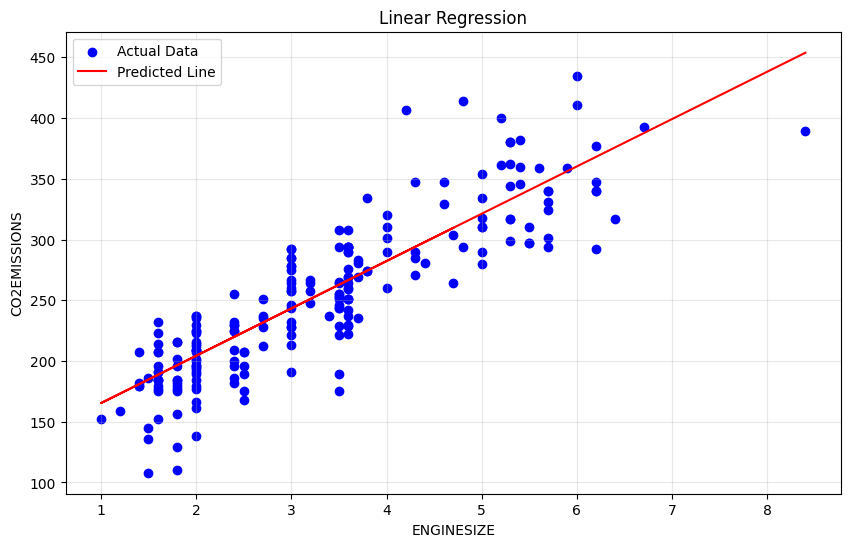

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Predicted Line")
plt.title("Linear Regression")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.legend() 
plt.grid(True, alpha=0.3)
plt.show()